An attempt at running experiments with the spherical rho theta projection. We are pretendign that the real smoke and the false alarm are two sources. 

In [1]:
import numpy as np
import matplotlib as plt

import SDOptimizer as SDOmodule
from SDOptimizer.SDOptimizer import SDOptimizer
from SDOptimizer.constants import SMOKE_FOLDERS, FALSE_ALARM_FOLDERS
#import importlib

#importlib.reload(SDOmodule)
plt.rcParams["figure.figsize"] = (10, 7)

SDO = SDOptimizer()

Define constants for the rest of the program.

In [2]:
#SMOKE_DATA_DIR = "data/smoke_data_full3D" # this data was emailed around
#FALSE_ALARM_DATA_DIR = "data/bike_data_full3D"
INFEASIBLE = [(3, -2, 4, -1)] # The infeasible region
SPHERICAL_PROJECTION = True
ALARM_THRESHOLD = 0.5e-6 
FALSE_ALARM_THRESHOLD = 4e-20 # This is MUCH lower than the NASA-specified value of 0.5e-6, 

# constants for the 
NUM_DETECTORS = 2
NUM_ITERATIONS = 20

Here we take the data which was in 3D and map it into a spherical projection. This is done by normalizing each axis to lie between $[-1, 1]$ and then computing the spherical coordinates of each point. The radius is then discarded and the $\phi$, $\rho$ projection is returned. If you would like to visualize this data in 3D, run `python vis_3D.py` in the terminal.

About to visualize the smoke sources from data/first_computer_full3D


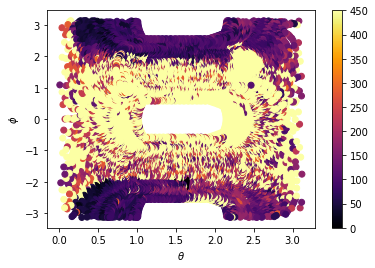

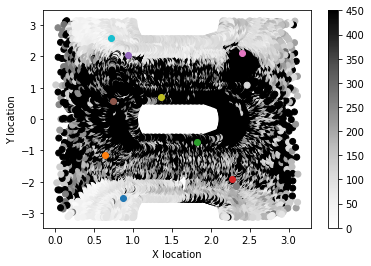

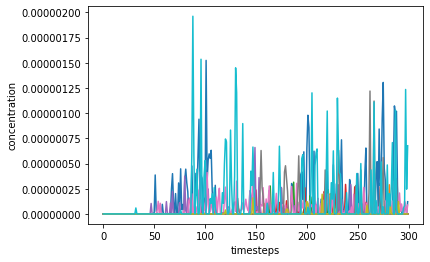

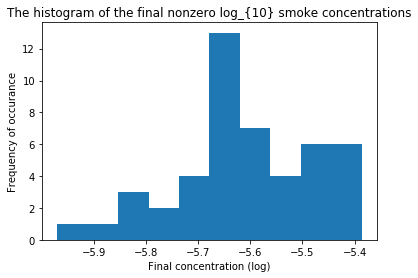

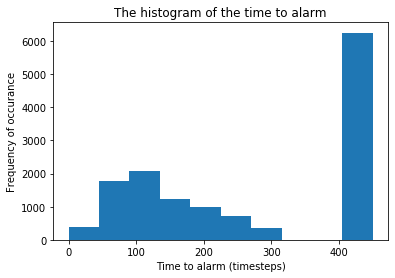

About to visualize the smoke sources from data/second_computer_full3D


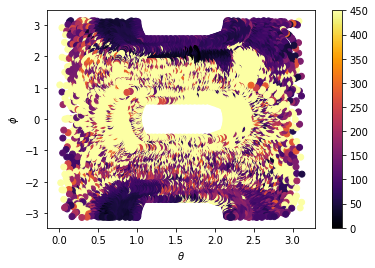

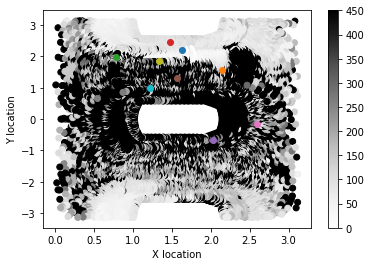

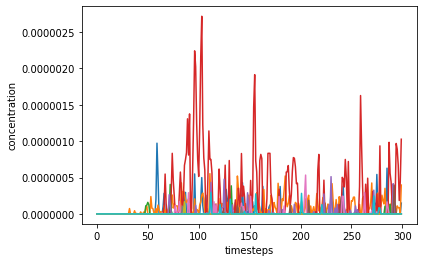

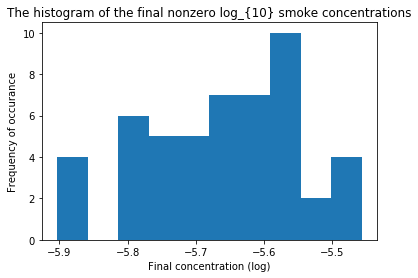

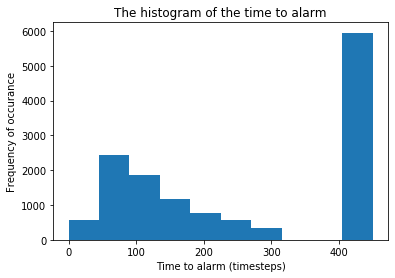

About to visualize the smoke sources from data/third_computer_full3D


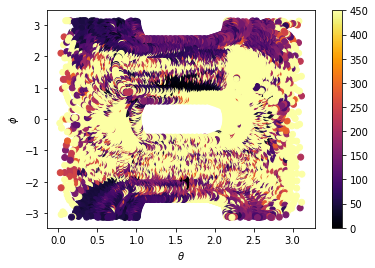

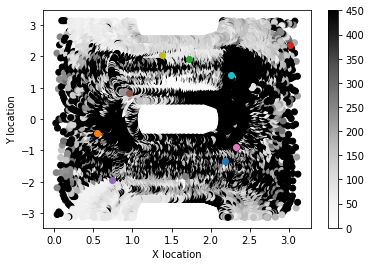

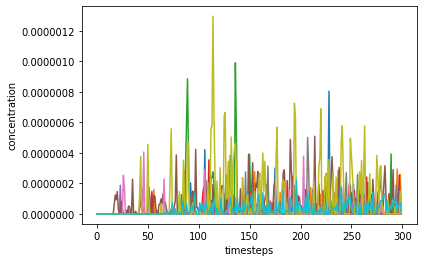

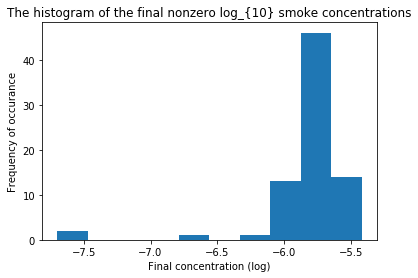

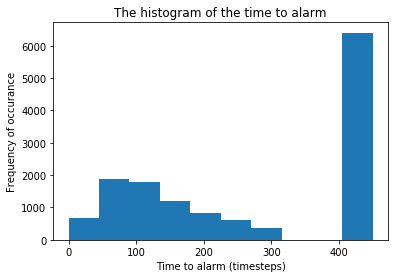

In [3]:
# load the smoke source data
smoke_sources = [] # set up an empty list of smoke sources which will be filled later
for smoke_folder in SMOKE_FOLDERS: # This iterates over the list of folders
    SDO.load_timestep_directory(smoke_folder)
    print("About to visualize the smoke sources from {}".format(smoke_folder))
    # get the time to alarm from the smoke source data
    new_smoke_source = SDO.get_time_to_alarm(False, False,
                                spherical_projection=SPHERICAL_PROJECTION,
                                alarm_threshold=ALARM_THRESHOLD,
                                visualize=True, write_figs=True) # the default value of flip is false, so this is simply included for clarity
    # add the new source to the list of sources
    smoke_sources.append(new_smoke_source)

Now get the false alarm data

About to visualize the false alarms from data/bike_full3D


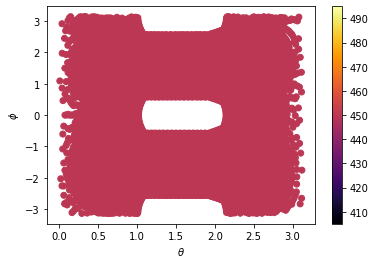

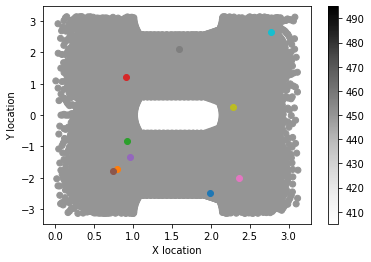

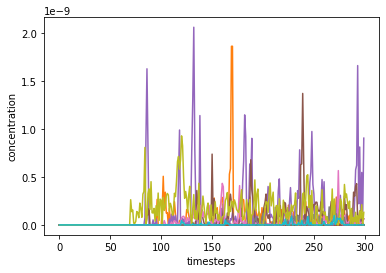

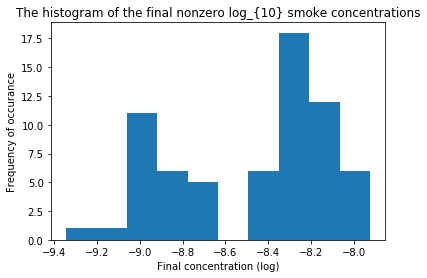

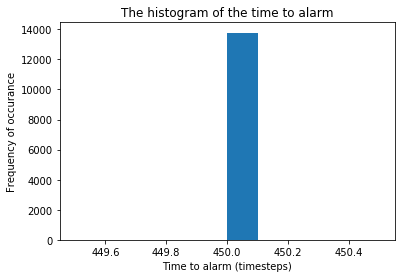

In [4]:
false_alarms = [] # set up the same sort of empty list for the false alarms
for false_alarm_folder in FALSE_ALARM_FOLDERS:
    # Get the false alarm data
    SDO.load_timestep_directory(false_alarm_folder)
    print("About to visualize the false alarms from {}".format(false_alarm_folder))
    # get the time to alarm for the false alarm source
    new_false_alarm = SDO.get_time_to_alarm(False, False,
                                spherical_projection=SPHERICAL_PROJECTION,
                                alarm_threshold=FALSE_ALARM_THRESHOLD,
                                visualize=True, write_figs=False) # the default value of flip is false, so this is simply included for clarity
    false_alarms.append(new_false_alarm) # add this to the list of false alarm sources

The next three cells demonstrate the optimization routine with one, two, and three detectors. The first return plot is the solution quality versus optimization iterations. The next is a visualization of the solution quality when one detector is moved.

/home/david/anaconda3/lib/python3.7/site-packages/scipy/optimize/_differentialevolution.py:773: RuntimeWarning: divide by zero encountered in double_scalars
  convergence=self.tol / convergence) is True):


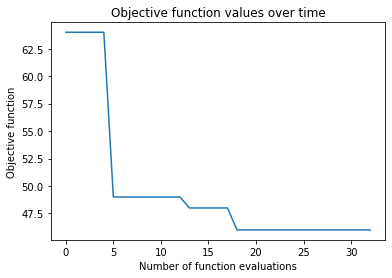

<Figure size 432x288 with 0 Axes>

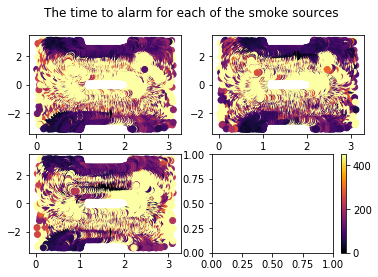

<Figure size 432x288 with 0 Axes>

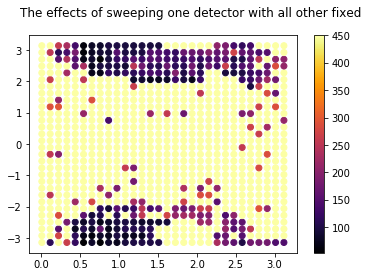

The bounds are now [(0.010540651564376273, 3.1192043970023673), (-3.141494847402163, 3.141592653589793)]
The locations are: (1.430, 2.153), 
the result of the optimization is:
      fun: 46.0
 message: 'Optimization terminated successfully.'
    nfev: 1023
     nit: 33
 success: True
    vals: [64.0, 64.0, 64.0, 64.0, 64.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 49.0, 48.0, 48.0, 48.0, 48.0, 48.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0, 46.0]
       x: array([1.42977533, 2.152936  ])


In [5]:
# running with one detector
description = SDO.optimize(smoke_sources, num_detectors=1, genetic=True)
print("the result of the optimization is:\n {}".format(description))

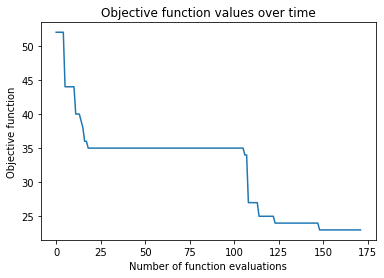

<Figure size 432x288 with 0 Axes>

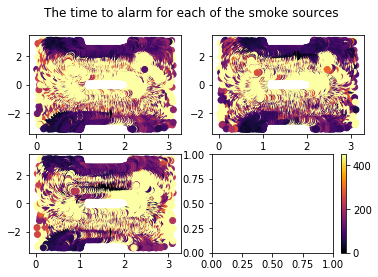

<Figure size 432x288 with 0 Axes>

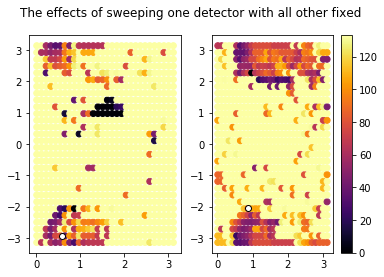

The bounds are now [(0.010540651564376273, 3.1192043970023673), (-3.141494847402163, 3.141592653589793), (0.010540651564376273, 3.1192043970023673), (-3.141494847402163, 3.141592653589793)]
The locations are: (0.870, -2.026), (0.579, -2.932), 
the result of the optimization is:
      fun: 23.0
 message: 'Optimization terminated successfully.'
    nfev: 10385
     nit: 172
 success: True
    vals: [52.0, 52.0, 52.0, 52.0, 52.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 40.0, 40.0, 40.0, 39.0, 38.0, 36.0, 36.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0, 35.0,

In [6]:
# running with two detectors
description = SDO.optimize(smoke_sources, num_detectors=2, genetic=True)
print("the result of the optimization is:\n {}".format(description))

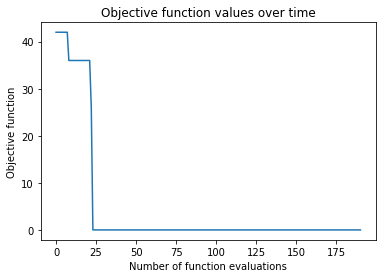

<Figure size 432x288 with 0 Axes>

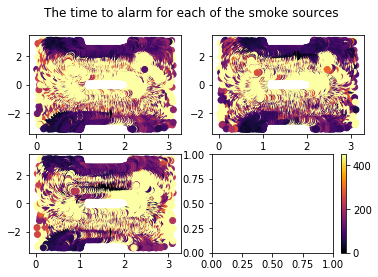

<Figure size 432x288 with 0 Axes>

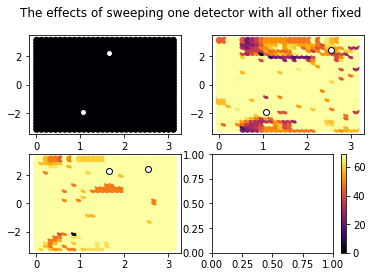

The bounds are now [(0.010540651564376273, 3.1192043970023673), (-3.141494847402163, 3.141592653589793), (0.010540651564376273, 3.1192043970023673), (-3.141494847402163, 3.141592653589793), (0.010540651564376273, 3.1192043970023673), (-3.141494847402163, 3.141592653589793)]
The locations are: (2.546, 2.462), (1.662, 2.262), (1.067, -1.922), 
the result of the optimization is:
      fun: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 17287
     nit: 191
 success: True
    vals: [42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 42.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 36.0, 26.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.

In [7]:
description = SDO.optimize(smoke_sources, num_detectors=3, genetic=True, multiobjective=False, visualize=True, type="worst_case")
print("the result of the optimization is:\n {}".format(description))

Here we look at the number of detectors versus solution quality. 

min x : 0.010540651564376273, max x : 3.1192043970023673, min y : -3.141494847402163, max y : 3.141592653589793


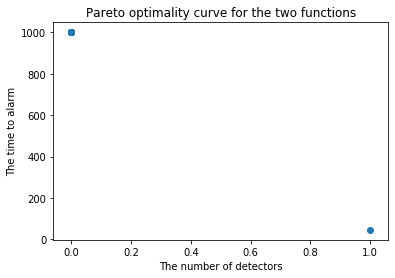

the result of the optimization is:


/home/david/dev/SmokeDetectorOptimization/SDOptimizer/SDOptimizer.py:878: UserWarning: Can't visualize the objective values for a multiobjective run
  UserWarning)


In [8]:
description = SDO.optimize(smoke_sources, num_detectors=3, genetic=True,
                           multiobjective=True, multiobjective_type="counting",
                           visualize=True, type="worst_case")

print("the result of the optimization is:\n {}".format(description))

Here we look at the competeting objectives between alarming quickly and not triggering the false alarm. 

min x : 0.010540651564376273, max x : 3.1192043970023673, min y : -3.141494847402163, max y : 3.141592653589793


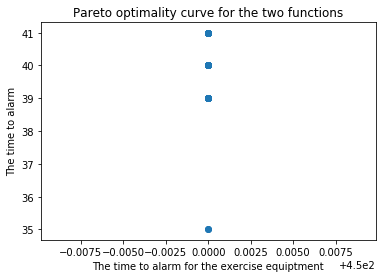

the result of the optimization is:


In [9]:
description = SDO.optimize(smoke_sources,
                           num_detectors=3,
                           genetic=True, multiobjective=True,
                           multiobjective_type="competing_function",
                           bad_sources=false_alarms, visualize=True,
                           type="worst_case")

print("the result of the optimization is:\n {}".format(description))

Do some performance evalution

100%|██████████| 20/20 [04:32<00:00, 13.64s/it]


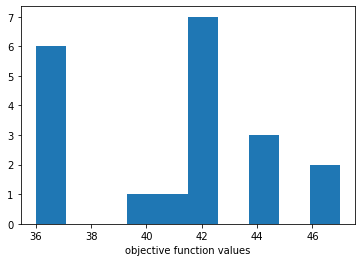

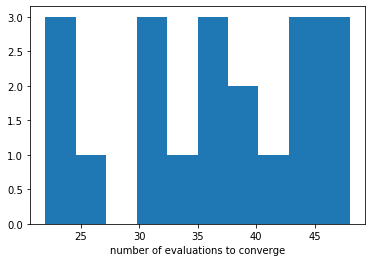

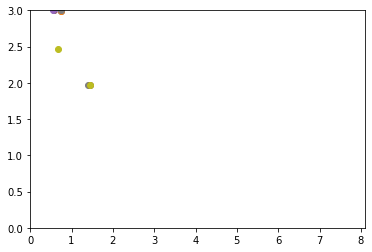

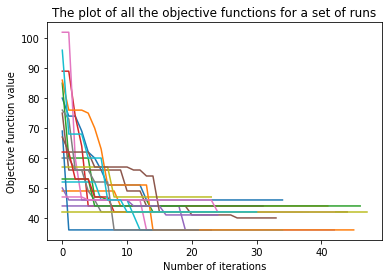

100%|██████████| 20/20 [1:05:52<00:00, 197.60s/it]


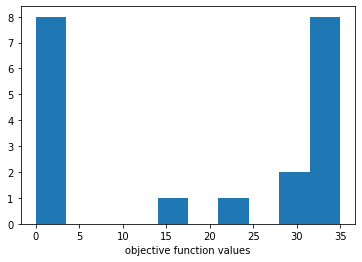

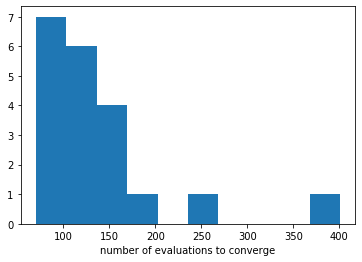

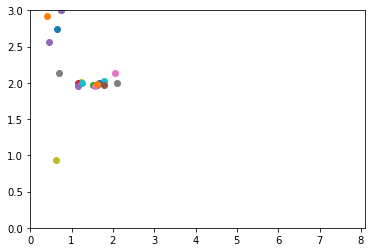

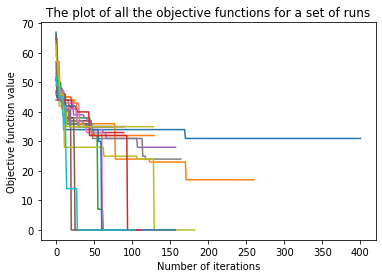

In [10]:
vals, locs, iterations, func_values = SDO.evaluate_optimization(smoke_sources,
                                                                num_detectors=1,
                                                                genetic=True,
                                                                num_iterations=NUM_ITERATIONS)





vals, locs, iterations, func_values = SDO.evaluate_optimization(smoke_sources,
                                                                num_detectors=2,
                                                                genetic=True,
                                                                num_iterations=NUM_ITERATIONS)